In [1]:
import numpy as np
import pandas as pd

In [7]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding='latin1')
df.head(10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [8]:
df=df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [18]:
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
pip install wordcloud


     -------------------------------------- 300.0/300.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shanaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shanaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shanaya\AppData\Roaming\nltk_data...


In [19]:
#Remove Stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(remove_stopwords)


In [24]:
#Find the 10 most frequent words for each class (remove stopwords first)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

ham_words = get_top_n_words(df[df['label'] == 'ham']['clean_text'], 10)
spam_words = get_top_n_words(df[df['label'] == 'spam']['clean_text'], 10)

print("Top 10 words in ham messages:")
for word, freq in ham_words:
    print(f"{word}: {freq}")

print("\nTop 10 words in spam messages:")
for word, freq in spam_words:
    print(f"{word}: {freq}")

Top 10 words in ham messages:
gt: 318
lt: 316
get: 305
ok: 287
ll: 262
go: 249
got: 244
ur: 241
know: 236
call: 236

Top 10 words in spam messages:
call: 355
free: 224
txt: 163
ur: 144
mobile: 127
text: 125
stop: 121
claim: 113
reply: 104
www: 98


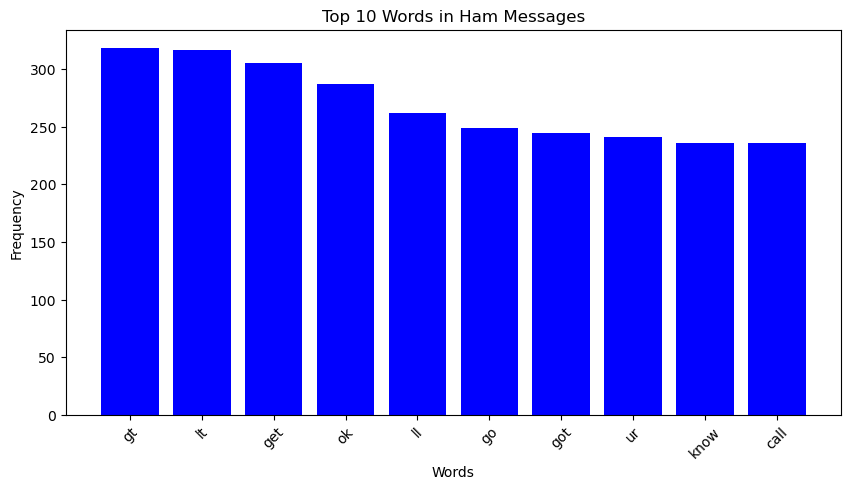

In [25]:
ham_words_dict = dict(ham_words)
plt.figure(figsize=(10, 5))
plt.bar(ham_words_dict.keys(), ham_words_dict.values(), color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Ham Messages')
plt.xticks(rotation=45)
plt.show()

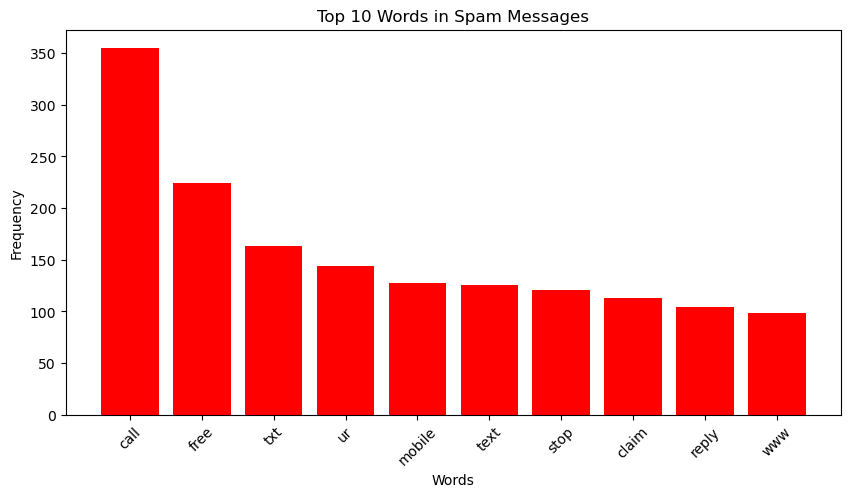

In [26]:
spam_words_dict = dict(spam_words)
plt.figure(figsize=(10, 5))
plt.bar(spam_words_dict.keys(), spam_words_dict.values(), color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Spam Messages')
plt.xticks(rotation=45)
plt.show()

In [30]:
#Find the 10 most frequent bi-rgams each class  (remove stopwords first)

def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

ham_bigrams = get_top_n_bigrams(df[df['label'] == 'ham']['clean_text'], 10)
spam_bigrams = get_top_n_bigrams(df[df['label'] == 'spam']['clean_text'], 10)

print("Top 10 bigrams in ham messages:")
for i, (bigram, freq) in enumerate(ham_bigrams, 1):
    print(f"{i}. {bigram}: {freq}")

print("\nTop 10 bigrams in spam messages:")
for i, (bigram, freq) in enumerate(spam_bigrams, 1):
    print(f"{i}. {bigram}: {freq}")


Top 10 bigrams in ham messages:
1. lt gt: 276
2. gon na: 58
3. call later: 50
4. ll call: 45
5. let know: 40
6. sorry ll: 39
7. take care: 37
8. good morning: 32
9. wan na: 28
10. lt decimal: 23

Top 10 bigrams in spam messages:
1. co uk: 49
2. please call: 46
3. po box: 24
4. 1000 cash: 23
5. guaranteed call: 23
6. prize guaranteed: 22
7. national rate: 20
8. selected receive: 19
9. send stop: 19
10. every week: 19


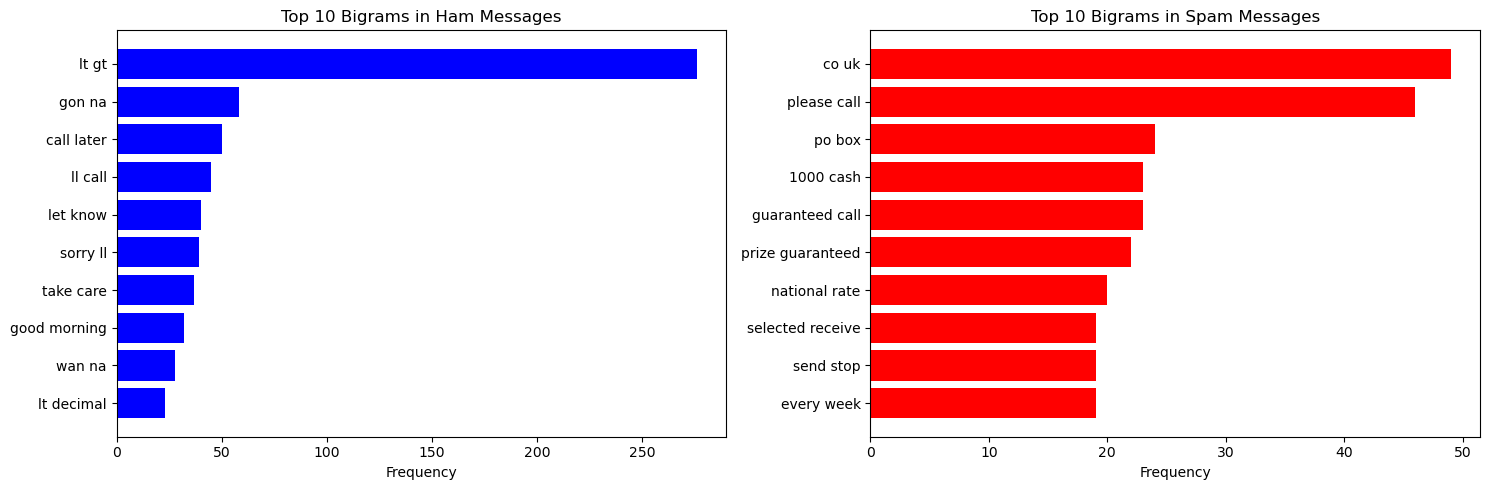

In [33]:
# Convert the bigram lists to DataFrames for plotting
ham_bigrams_df = pd.DataFrame(ham_bigrams, columns=['Bigram', 'Frequency'])
spam_bigrams_df = pd.DataFrame(spam_bigrams, columns=['Bigram', 'Frequency'])

# Plot the bigrams
fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

# Plot for ham bigrams
axes[0].barh(ham_bigrams_df['Bigram'], ham_bigrams_df['Frequency'], color='blue')
axes[0].set_title('Top 10 Bigrams in Ham Messages')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

# Plot for spam bigrams
axes[1].barh(spam_bigrams_df['Bigram'], spam_bigrams_df['Frequency'], color='red')
axes[1].set_title('Top 10 Bigrams in Spam Messages')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [34]:
#Find the 10 most frequent tri-rgams each class  (remove stopwords first)

def get_top_n_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

ham_trigrams = get_top_n_trigrams(df[df['label'] == 'ham']['clean_text'], 10)
spam_trigrams = get_top_n_trigrams(df[df['label'] == 'spam']['clean_text'], 10)

print("Top 10 trigrams in ham messages:")
for i, (trigram, freq) in enumerate(ham_trigrams, 1):
    print(f"{i}. {trigram}: {freq}")

print("\nTop 10 trigrams in spam messages:")
for i, (trigram, freq) in enumerate(spam_trigrams, 1):
    print(f"{i}. {trigram}: {freq}")

Top 10 trigrams in ham messages:
1. ll call later: 41
2. sorry ll call: 38
3. lt decimal gt: 23
4. happy new year: 18
5. like lt gt: 14
6. pls send message: 13
7. gt lt gt: 13
8. cant pick phone: 12
9. pick phone right: 12
10. phone right pls: 12

Top 10 trigrams in spam messages:
1. prize guaranteed call: 21
2. suite342 2lands row: 15
3. reply call 08000930705: 14
4. land line claim: 14
5. private 2003 account: 13
6. 2003 account statement: 13
7. guaranteed 1000 cash: 12
8. camcorder reply call: 12
9. shows 800 un: 12
10. 800 un redeemed: 12


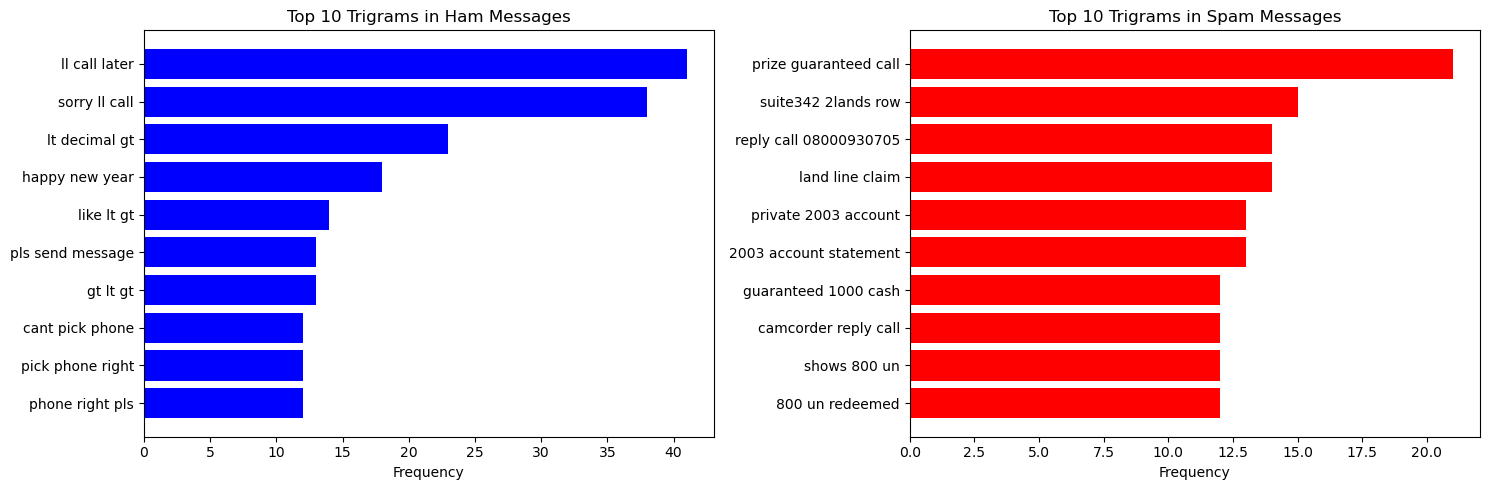

In [35]:
# Convert the trigram lists to DataFrames for plotting
ham_trigrams_df = pd.DataFrame(ham_trigrams, columns=['Trigram', 'Frequency'])
spam_trigrams_df = pd.DataFrame(spam_trigrams, columns=['Trigram', 'Frequency'])

# Plot the trigrams
fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

# Plot for ham trigrams
axes[0].barh(ham_trigrams_df['Trigram'], ham_trigrams_df['Frequency'], color='blue')
axes[0].set_title('Top 10 Trigrams in Ham Messages')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

# Plot for spam trigrams
axes[1].barh(spam_trigrams_df['Trigram'], spam_trigrams_df['Frequency'], color='red')
axes[1].set_title('Top 10 Trigrams in Spam Messages')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

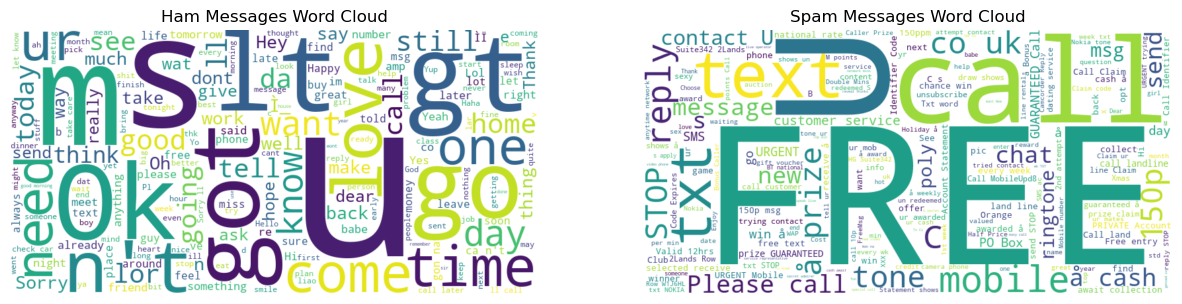

In [36]:
# Create wordcloud each class (remove stopwords first)
# Generate word clouds for each class
ham_text = ' '.join(df[df['label'] == 'ham']['clean_text'])
spam_text = ' '.join(df[df['label'] == 'spam']['clean_text'])

# Create the wordcloud objects
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot the wordclouds
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(ham_wordcloud, interpolation='bilinear')
axes[0].set_title('Ham Messages Word Cloud')
axes[0].axis('off')

axes[1].imshow(spam_wordcloud, interpolation='bilinear')
axes[1].set_title('Spam Messages Word Cloud')
axes[1].axis('off')

plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

#BOW Model
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)


In [44]:
#Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)

#F1-score
f1_bow = f1_score(y_test, y_pred_bow, pos_label='spam')
print(f"F1-score with Bag-of-Words: {f1_bow}")

F1-score with Bag-of-Words: 0.9370629370629371


In [45]:
#TFIDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)

f1_tfidf = f1_score(y_test, y_pred_tfidf, pos_label='spam')
print(f"F1-score with Tf-IDF: {f1_tfidf}")


F1-score with Tf-IDF: 0.8372093023255813


In [47]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shanaya\AppData\Roaming\nltk_data...


True

In [48]:
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    
    # Remove email-ids, urls, and html tags
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize each token
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

stop_words = set(stopwords.words('english'))

# Apply text preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Split the cleaned dataset into training and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# Convert the preprocessed text data to Tf-IDF vectors
X_train_tfidf_clean = tfidf_vectorizer.fit_transform(X_train_clean)
X_test_tfidf_clean = tfidf_vectorizer.transform(X_test_clean)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf_clean, y_train_clean)
y_pred_tfidf_clean = model.predict(X_test_tfidf_clean)

# Calculate the F1-score
f1_tfidf_clean = f1_score(y_test_clean, y_pred_tfidf_clean, pos_label='spam')
print(f"F1-score with Tf-IDF and preprocessing: {f1_tfidf_clean}")


F1-score with Tf-IDF and preprocessing: 0.8593155893536121


In [49]:
print(f"F1-score with Bag-of-Words: {f1_bow}")
print(f"F1-score with Tf-IDF: {f1_tfidf}")
print(f"F1-score with Tf-IDF and preprocessing: {f1_tfidf_clean}")

F1-score with Bag-of-Words: 0.9370629370629371
F1-score with Tf-IDF: 0.8372093023255813
F1-score with Tf-IDF and preprocessing: 0.8593155893536121
